In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | burgos
Processing Record 2 of Set 13 | hobart
Processing Record 3 of Set 13 | airai
Processing Record 4 of Set 13 | san policarpo
Processing Record 5 of Set 13 | victoria
Processing Record 6 of Set 13 | mataura
Processing Record 7 of Set 13 | belaya gora
Processing Record 8 of Set 13 | port lincoln
Processing Record 9 of Set 13 | tuktoyaktuk
Processing Record 10 of Set 13 | bethel
Processing Record 11 of Set 13 | rikitea
Processing Record 12 of Set 13 | talnakh
Processing Record 13 of Set 13 | cape town
Processing Record 14 of Set 13 | yar-sale
Processing Record 15 of Set 13 | porto santo
Processing Record 16 of Set 13 | kodinsk
Processing Record 17 of Set 13 | bluff
Processing Record 18 of Set 13 | nikolskoye
Processing Record 19 of Set 13 | tiksi
Processing Record 20 of Set 13 | port elizabeth
Processing Record 21 of Set 13 | khatanga
Processing Record 22 of Set 13 | sinnamary
Processing Recor

Processing Record 32 of Set 16 | bilma
Processing Record 33 of Set 16 | hambantota
Processing Record 34 of Set 16 | aykhal
Processing Record 35 of Set 16 | nisia floresta
Processing Record 36 of Set 16 | lichtenburg
Processing Record 37 of Set 16 | tsihombe
City not found. Skipping...
Processing Record 38 of Set 16 | buraydah
Processing Record 39 of Set 16 | maniitsoq
Processing Record 40 of Set 16 | kavieng
Processing Record 41 of Set 16 | katsuura
Processing Record 42 of Set 16 | makinsk
Processing Record 43 of Set 16 | hithadhoo
Processing Record 44 of Set 16 | upernavik
Processing Record 45 of Set 16 | lolua
City not found. Skipping...
Processing Record 46 of Set 16 | kruisfontein
Processing Record 47 of Set 16 | falealupo
City not found. Skipping...
Processing Record 48 of Set 16 | okhotsk
Processing Record 49 of Set 16 | malwan
City not found. Skipping...
Processing Record 50 of Set 16 | labrea
Processing Record 1 of Set 17 | alofi
Processing Record 2 of Set 17 | shakawe
Processi

Processing Record 17 of Set 20 | bolobo
Processing Record 18 of Set 20 | tolaga bay
Processing Record 19 of Set 20 | dzhebariki-khaya
Processing Record 20 of Set 20 | karratha
Processing Record 21 of Set 20 | baiao
Processing Record 22 of Set 20 | rizal
Processing Record 23 of Set 20 | chikoy
City not found. Skipping...
Processing Record 24 of Set 20 | kirkuk
Processing Record 25 of Set 20 | pitimbu
Processing Record 26 of Set 20 | prokopyevsk
Processing Record 27 of Set 20 | pevek
Processing Record 28 of Set 20 | pierre
Processing Record 29 of Set 20 | kieta
Processing Record 30 of Set 20 | vardo
Processing Record 31 of Set 20 | broken hill
Processing Record 32 of Set 20 | rafaela
Processing Record 33 of Set 20 | birjand
Processing Record 34 of Set 20 | surt
Processing Record 35 of Set 20 | awjilah
Processing Record 36 of Set 20 | kendari
Processing Record 37 of Set 20 | roald
Processing Record 38 of Set 20 | lienz
Processing Record 39 of Set 20 | bloomfield
Processing Record 40 of Se

Processing Record 1 of Set 24 | astana
Processing Record 2 of Set 24 | xuzhou
Processing Record 3 of Set 24 | cozumel
Processing Record 4 of Set 24 | kuhestan
City not found. Skipping...
Processing Record 5 of Set 24 | privokzalnyy
City not found. Skipping...
Processing Record 6 of Set 24 | bloemfontein
Processing Record 7 of Set 24 | gbadolite
Processing Record 8 of Set 24 | kautokeino
Processing Record 9 of Set 24 | mutis
Processing Record 10 of Set 24 | mrakovo
Processing Record 11 of Set 24 | one hundred mile house
City not found. Skipping...
Processing Record 12 of Set 24 | barcelos
Processing Record 13 of Set 24 | dicabisagan
Processing Record 14 of Set 24 | vila franca do campo
Processing Record 15 of Set 24 | mushie
Processing Record 16 of Set 24 | vaitupu
City not found. Skipping...
Processing Record 17 of Set 24 | oborniki
Processing Record 18 of Set 24 | mogadishu
Processing Record 19 of Set 24 | antalaha
Processing Record 20 of Set 24 | brainerd
Processing Record 21 of Set 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Burgos,42.3394,-3.7079,84.61,21,20,6.91,ES,2021-07-01 16:39:59
1,Hobart,-42.8794,147.3294,53.46,83,90,1.99,AU,2021-07-01 16:39:59
2,Airai,-8.9266,125.4092,56.79,92,57,3.62,TL,2021-07-01 16:39:59
3,San Policarpo,12.1791,125.5072,80.78,80,94,1.95,PH,2021-07-01 16:40:00
4,Victoria,22.2855,114.1577,86.38,85,100,1.99,HK,2021-07-01 16:40:00
5,Mataura,-46.1927,168.8643,32.49,95,83,2.62,NZ,2021-07-01 16:40:00
6,Belaya Gora,68.5333,146.4167,50.76,50,11,9.48,RU,2021-07-01 16:40:01
7,Port Lincoln,-34.7333,135.8667,52.95,83,86,17.87,AU,2021-07-01 16:40:01
8,Tuktoyaktuk,69.4541,-133.0374,44.60,93,90,12.66,CA,2021-07-01 16:40:03
9,Bethel,41.3712,-73.4140,83.91,77,90,9.22,US,2021-07-01 16:40:03


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Burgos,ES,2021-07-01 16:39:59,42.3394,-3.7079,84.61,21,20,6.91
1,Hobart,AU,2021-07-01 16:39:59,-42.8794,147.3294,53.46,83,90,1.99
2,Airai,TL,2021-07-01 16:39:59,-8.9266,125.4092,56.79,92,57,3.62
3,San Policarpo,PH,2021-07-01 16:40:00,12.1791,125.5072,80.78,80,94,1.95
4,Victoria,HK,2021-07-01 16:40:00,22.2855,114.1577,86.38,85,100,1.99
5,Mataura,NZ,2021-07-01 16:40:00,-46.1927,168.8643,32.49,95,83,2.62
6,Belaya Gora,RU,2021-07-01 16:40:01,68.5333,146.4167,50.76,50,11,9.48
7,Port Lincoln,AU,2021-07-01 16:40:01,-34.7333,135.8667,52.95,83,86,17.87
8,Tuktoyaktuk,CA,2021-07-01 16:40:03,69.4541,-133.0374,44.60,93,90,12.66
9,Bethel,US,2021-07-01 16:40:03,41.3712,-73.4140,83.91,77,90,9.22


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

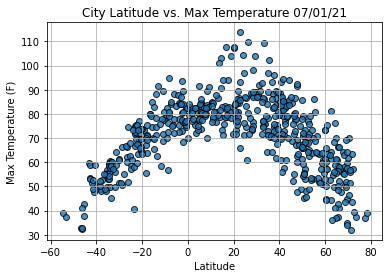

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

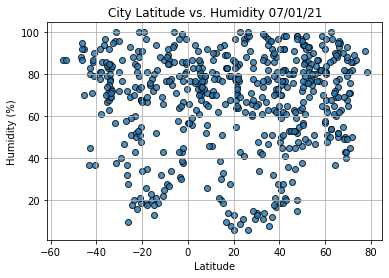

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

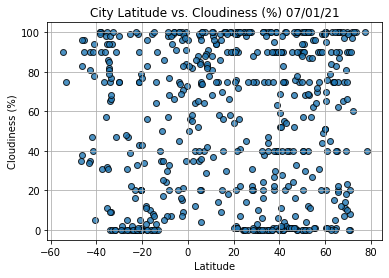

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

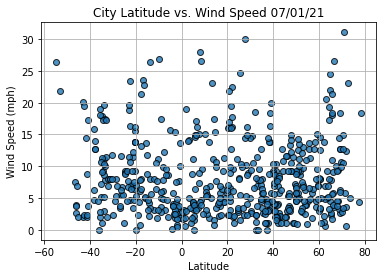

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()